# Data_Pyrates_Solutions 


In [18]:
pip install wordcloud  

In [3]:
#import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #for visualisation
import datetime as DT
import io
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
Q21. Which reason of visit has maximum mortality rate.

In [24]:
# Which reason of visit has maximum mortality rate.

#Loading a excel file into a DataFrame
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
m = df["ExpectedMortality"].max()
print("Maximum Mortality :")
print(m)
print("\n'Reason for visit' which shows maximum mortality rate : ")
r = df["PrimaryDiagnosis"].where(df["ExpectedMortality"] == m)
new_df = r.dropna()
print(new_df)

Maximum Mortality :
0.9899452598970535

'Reason for visit' which shows maximum mortality rate : 
88    Pneumonia
Name: PrimaryDiagnosis, dtype: object


####Q22	Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)

In [9]:
#Loading a excel file into a DataFrame
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")

g1 = df.groupby("Service")


icu = g1.get_group('ICU')
neurology = g1.get_group('Neurology')
hospitalist = g1.get_group('Hospitalist')
orthopeadics = g1.get_group('Orthopeadics')
cardiology = g1.get_group('Cardiology')
general_medicine = g1.get_group('General Medicine')




Nuerology_Loc_mean = neurology['ExpectedLOS'].mean()
Hospitalist_Loc_mean = hospitalist['ExpectedLOS'].mean()
Orthopeadics_Loc_mean = orthopeadics['ExpectedLOS'].mean()
Cardiology_Loc_mean = cardiology['ExpectedLOS'].mean()
General_Medicine_Loc_mean = general_medicine['ExpectedLOS'].mean()
Icu_Loc_mean = icu['ExpectedLOS'].mean()


g2 = df.groupby("DischargeDisposition")

expired = g2.get_group('Expired')
home = g2.get_group('Home')
transfer = g2.get_group('Transfer')


Expired_Loc_mean = expired['ExpectedLOS'].mean()
Home_Loc_mean = home['ExpectedLOS'].mean()
Home_Loc_mean = transfer['ExpectedLOS'].mean()


data1 = {
  "Service": ["Cardiology","ICU","Neurology","Hospitalist","Orthopeadics","General Medicine"],
  "Average": [Cardiology_Loc_mean,Icu_Loc_mean,Nuerology_Loc_mean ,Hospitalist_Loc_mean ,Orthopeadics_Loc_mean,General_Medicine_Loc_mean]
}

df1 = pd.DataFrame(data1)
print("Average LOS based on Service:\n") 
print(df1)

data2 = {
  "DischargeDisposition": ["Expired","Home","Transfer"],
  "Average": [Expired_Loc_mean,Home_Loc_mean,Home_Loc_mean]
}

df2 = pd.DataFrame(data2)
print("\nAverage LOS based on DischargeDisposition:\n") 
print(df2)

Average LOS based on Service:

            Service    Average
0        Cardiology  12.231596
1               ICU  12.656630
2         Neurology  11.195596
3       Hospitalist   7.818382
4      Orthopeadics   3.586373
5  General Medicine   6.090473

Average LOS based on DischargeDisposition:

  DischargeDisposition   Average
0              Expired  8.387274
1                 Home  8.864248
2             Transfer  8.864248


#### Q23	Add column 'Age' in Patient table.

In [16]:
import datetime as DT
import io

df =pd.read_excel("HospitalDatabase.xlsx","Patients")
# Using DataFrame.insert() to add a column
now = pd.Timestamp('now')
df.insert(5,"Age",(now - df['DateOfBirth']).astype('<m8[Y]'))
df['Age'] = df['Age'].astype('int64')
print(df.head())

   PatientID FirstName LastName             DateOfBirth Gender  Age   Race  \
0          1     Lanni      Sue 1960-01-01 00:00:00.000   Male   63  White   
1          2       Far    Myers 1985-11-15 02:08:42.090   Male   37  White   
2          3   Devlin   Michael 1976-04-15 02:52:09.762   Male   46  White   
3          4   Carmine    Texas 1968-10-15 03:32:13.635   Male   54  White   
4          5     Tann      Bama 1962-05-01 19:12:58.950   Male   60  White   

  Language  
0  English  
1  English  
2  English  
3  English  
4  English  


#### 24	Using arrays and loops, find the count of patients based on gender.


In [28]:
#Solution 1
df =pd.read_excel("HospitalDatabase.xlsx","Patients")
# pandas count distinct values in column
c = df['Gender'].value_counts()
print(c)

Male      537
Female    408
Name: Gender, dtype: int64


In [33]:
#solution 2 Using Arrays and loops
df =pd.read_excel("HospitalDatabase.xlsx","Patients")
countm = 0
countf = 0
for i in df['Gender']:
    if(i=="Male"):
        countm+=1
    else:
        countf+=1

print("Males :",countm)
print("Females :",countf)

Males : 537
Females : 408


#### 25	Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'. Create a new column to show your analysis.  


#### 26	Plot a graph to show the distribution of expected mortality.


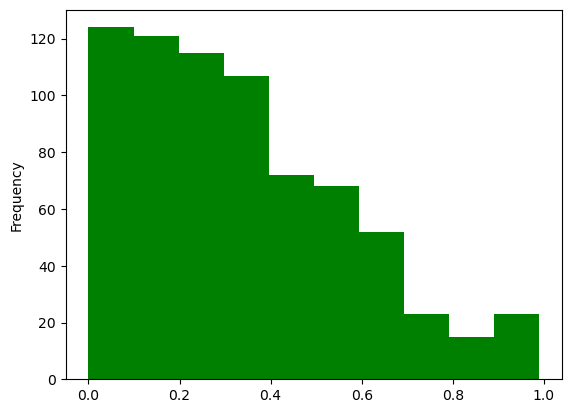

In [7]:
#Loading a excel file into a DataFrame
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
df["ExpectedMortality"].plot(kind = 'hist',color="green")
plt.show()

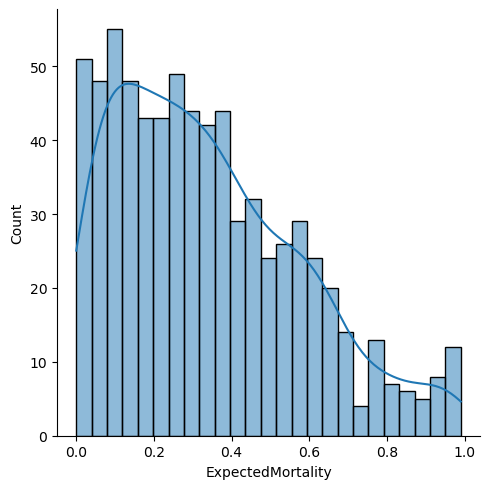

In [11]:
#Using seaborn distribution plot
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
sns.displot(df["ExpectedMortality"],kde=True,bins=25)
plt.show()


#### 27	Which departmentID has maximum number of visits scheduled.


In [29]:
df =pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
print("Department ID with maximum number of visits scheduled :")
id = df['VisitDepartmentID'].max()
print(id)

Department ID with maximum number of visits scheduled :
12


#### 28	Find the visit type with maximum 'No Show'.


In [20]:
#Not final code
df_am =pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits",usecols=['VisitType','VisitStatus'])
group1 = df_am.groupby(['VisitStatus'])
df1 =group1.get_group("NoShow")
df1
group = df_am.groupby(['VisitType','VisitStatus'])['VisitStatus'].count()
print(group)

print( "\n\nThe visit type with maximum 'No Show' :\n")


KeyError: 'NoShow'

#### 29	Which demographic patients are prone to get stroke?


In [58]:
df_pa = pd.read_excel("HospitalDatabase.xlsx","Patients",usecols=['Gender','Race','Language'])
df_re = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry",usecols=['PrimaryDiagnosis','PatientID'])
g = df_re.groupby(['PrimaryDiagnosis'])
df_stroke = g.get_group('Stroke')
#count_of_stoke_patients = len(df_stroke.index)
#print("Patients id's Diagnosed with Stroke:\n\n",df_stroke)
#print("\n\nTotal count of Patients id's Diagnosed with Stroke:\n\n",count_of_stoke_patients)
df_final = df_stroke.join(df_pa)
#print(df_final.to_string())
prone_to_stroke = df_final.groupby(['Gender','Race','Language'])
prone_to_stroke_count = df_final.groupby(['Gender','Race','Language'])['PatientID'].count()
print("\n\nDemographic of patients  who are more  prone to get stroke in acsending order  :\n")
print(prone_to_stroke_count)




Demographic of patients  who are more  prone to get stroke in acsending order  :

Gender  Race                    Language
Female  Black/African-American  English     14
                                Spanish      3
        White                   English      8
                                Spanish      6
Male    Black/African-American  English     19
                                Spanish      5
        White                   English     11
                                Spanish      2
Name: PatientID, dtype: int64


#### 30	Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.


In [43]:
df  = pd.read_excel("HospitalDatabase.xlsx","Providers")
df2 = df.loc[(df['ProviderID']> 11) & (df['ProviderID']< 20) & (df['ProviderSpecialty'] == 'Surgery')]
print(df2)

    ProviderID     ProviderName ProviderSpecialty     ProviderDateOnStaff
11          12         Sarah Ab           Surgery 1998-08-18 05:22:40.762
12          13  Abigail Marriot           Surgery 1998-11-08 12:25:45.705
13          14          Dave Yu           Surgery 1999-06-26 16:18:57.436
14          15  Christian Saint           Surgery 2000-08-27 00:12:40.326
15          16     Perry Pardon           Surgery 2001-02-13 11:49:17.862


#### 31	If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.


In [14]:
df =pd.read_excel("HospitalDatabase.xlsx","Patients")
df.loc[ df["Gender"] == 'Female', "FirstName"] = 'Ms. '+df["FirstName"]
df.loc[ df["Gender"] == 'Male', "FirstName"] = 'Mr. '+df["FirstName"]
pd.options.display.max_rows = 1000 #print 1000 rows
df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Mr. Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Mr. Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Mr. Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Mr. Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Mr. Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
5,6,Mr. Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English
6,7,Mr. Skipton,Bar,1975-11-25 22:23:53.525,Male,White,English
7,8,Mr. Alexandra,Green,1967-06-16 16:37:21.694,Male,White,English
8,9,Mr. Devlin,Black,1974-09-24 23:43:46.185,Male,White,English
9,10,Mr. Granny,Man,1969-09-15 11:20:42.218,Male,White,English


#### 32	Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.


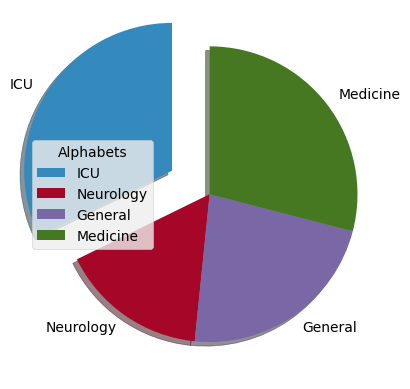

In [43]:
#Creating Pie Charts
# creating dataframe

dic = {"ExpectedLOS":[10,5,7,9],"Service": ["ICU", "Neurology", "General", "Medicine"]}
df = pd.DataFrame(dic)
myexplode=[0.3,0,0,0]
mycolors=["red","black","green","Blue"]

# plot a Pie Chart 
plt.pie(df["ExpectedLOS"],labels = df["Service"],shadow= True,startangle=90,explode=myexplode)
plt.legend(title="Alphabets")
plt.show()

#### 33	Plot a graph to show the distribution of expected length of stay.


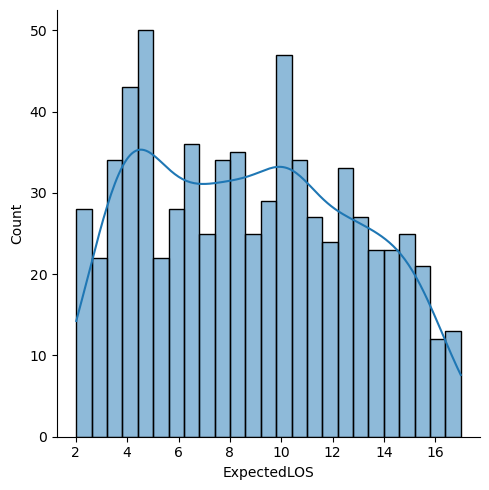

In [5]:
#Using seaborn distribution plot
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
sns.displot(df["ExpectedLOS"],kde=True,bins=25)
plt.show()

#### 34	Create a WordCloud Chart with Reason For Visit.


(-0.5, 1599.5, 799.5, -0.5)

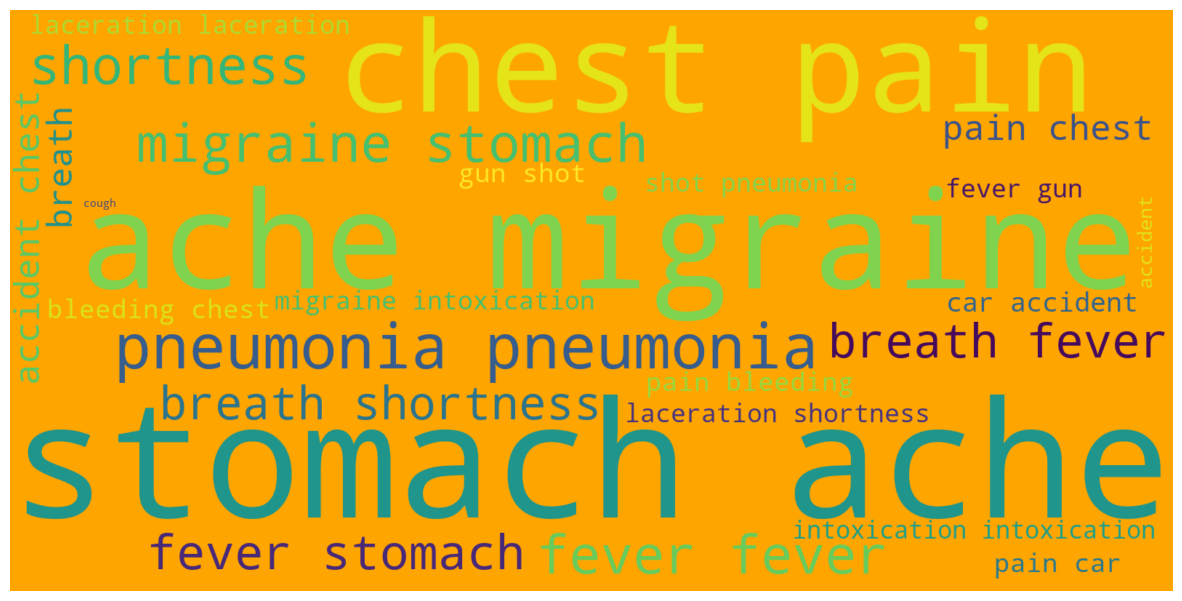

In [2]:
#Create a WordCloud Chart with Reason For Visit.

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Optional helpful plot stypes:
plt.style.use('bmh') #setting up 'bmh' as "Bayesian Methods for Hackers" style sheet
plt.style.use('ggplot') #R ggplot stype
df = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
#df['ReasonForVisit'] = df['ReasonForVisit'].fillna(value="")
word_string=" ".join(df['ReasonForVisit'].str.lower())
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="Orange", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')                              

#### 35	np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.


In [12]:
arr = np.arange(1,31).reshape(6,5)
print("\nBeofre Slicing the 2D array: \n")
print(arr) # 2D array
print("\nAfter Slicing the 2D array: \n")
arr1 =[arr[0,3:],arr[4,3:],arr[5,3:]]
arr2 =np.array(arr1)
print(arr2)
l=[]
print("\nWhen the value is less than 6, print as -1,else print 99: \n")
for x in arr2:
    for y in x:
        
        if(y<6):
            y=-1
            l.append(y)
        else:
            y=99
            l.append(y)
 
arr3 = np.array(l)
newarr = arr3.reshape(3,2)
print(newarr)


Beofre Slicing the 2D array: 

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

After Slicing the 2D array: 

[[ 4  5]
 [24 25]
 [29 30]]

When the value is less than 6, print as -1,else print 99: 

[[-1 -1]
 [99 99]
 [99 99]]


#### 36	Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)


In [2]:
df =pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
df1 = df.loc[(df['BloodPressureSystolic']> 180) & (df['BloodPressureDiastolic']< 120)]
#TO retrieve count of patients
c= len(df1.index)
print("The count of patients who are prone to hypertension crisis:\n")
print(c)

The count of patients who are prone to hypertension crisis:

12


#### 37	Display the data where actual LOS is greater than expected LOS.


In [17]:
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")

#insert new column 'ActualLOS' to 'Discharges' sheet.

df.insert(8,"ActualLOS",(df['DischargeDate'] - df['AdmissionDate']) / np.timedelta64(1, 'D'))
#print(df.head())

# Display the data where actual LOS is greater than expected LOS.

df1 = df.loc[(df['ActualLOS'] > df['ExpectedLOS'])]
print(df1.head())

   AdmissionID  PatientID AdmissionDate           DischargeDate  \
1          257         93    2018-01-06 2018-01-18 02:59:04.667   
4          258        103    2018-01-07 2018-01-15 13:32:36.157   
5          395        109    2018-01-07 2018-01-22 17:57:37.103   
6          396        115    2018-01-08 2018-01-17 02:19:05.623   
7          259        116    2018-01-08 2018-01-20 03:40:53.605   

  DischargeDisposition     Service PrimaryDiagnosis  ExpectedLOS  ActualLOS  \
1              Expired  Cardiology       Broken Leg     6.816558  12.124360   
4              Expired  Cardiology       Broken Leg     2.639297   8.564307   
5              Expired  Cardiology              Flu     2.981758  15.748346   
6              Expired  Cardiology              Flu     4.959098   9.096593   
7              Expired  Cardiology       Broken Leg     2.279624  12.153398   

   ExpectedMortality  
1           0.628827  
4           0.055468  
5           0.192976  
6           0.254923  
7      

#### 38	Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.


In [46]:
df =pd.read_excel("HospitalDatabase.xlsx","Patients")
df1 = df.loc[(df['PatientID']> 101) & (df['PatientID']< 200)]
#TO retrieve subset of columns from a dataframe
fl_name = df1[["FirstName", "LastName"]]
print(fl_name)

    FirstName    LastName
101     Gipsy    Frankton
102    Jethro      Wharin
103       Viv     Aylward
104     Swift   Dreschler
105     Fadel  Jacquemard
..        ...         ...
194  Cummings      Malbon
195  Cathlene     Kidwell
196      Noam    Laguerre
197      Arie     Bayless
198    Janaye     O'Mohun

[98 rows x 2 columns]


#### 39	Delete the column 'DischargeDispostion' iteratively.


In [13]:
# Create a dataframe from a dict
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
print("\nThe DataFrame object before deleting the column\n")
print(df.head())
df1 = df.drop('DischargeDisposition',axis=1)
print("\nThe DataFrame object after deleting the column DischargeDisposition\n")
print(df1.head())


The DataFrame object before deleting the column

   AdmissionID  PatientID AdmissionDate           DischargeDate  \
0            1          9    2018-01-01 2018-01-07 18:06:06.408   
1          257         93    2018-01-06 2018-01-18 02:59:04.667   
2          152        101    2018-01-07 2018-01-11 16:16:06.782   
3          361        102    2018-01-07 2018-01-15 04:48:33.134   
4          258        103    2018-01-07 2018-01-15 13:32:36.157   

  DischargeDisposition     Service PrimaryDiagnosis  ExpectedLOS  \
0              Expired  Cardiology              AMI     9.646857   
1              Expired  Cardiology       Broken Leg     6.816558   
2              Expired  Cardiology   Kidney Failure     6.580273   
3              Expired  Cardiology             Afib    12.794536   
4              Expired  Cardiology       Broken Leg     2.639297   

   ExpectedMortality  
0           0.061540  
1           0.628827  
2           0.573887  
3           0.222163  
4           0.055468  


#### 40	Create a jointplot on expected mortality & expected length of stay.

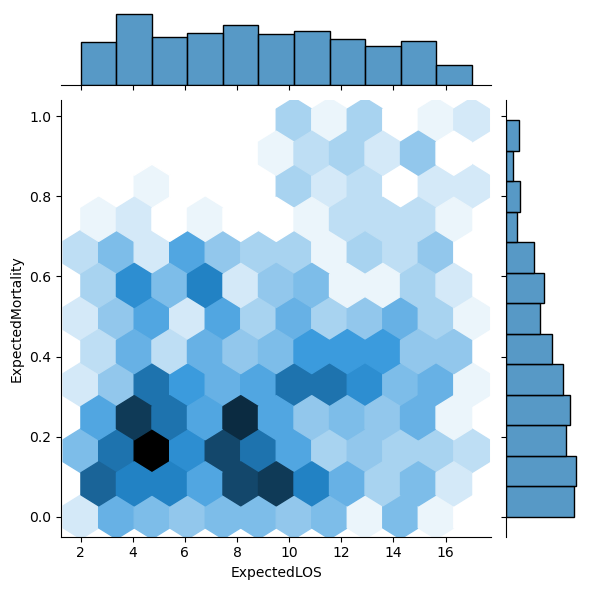

In [4]:
# loading dataset
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
  
# draw jointplot with
# hex kind
sns.jointplot(x = "ExpectedLOS", y = "ExpectedMortality",
              kind = "hex", data = df)
# show the plot
plt.show()
  